---
**Turma**: 15

**Grupo**: 11 - Bruno Correia, Gilson Costa, Vivian Liu

**Contato**: `brunovpm@hotmail.com, gilson.costa@gmail.com, liuoliveira.vivian@gmail.com`

**Licença deste notebook**:
![CC BY](https://licensebuttons.net/l/by/3.0/88x31.png)

[Clique aqui para saber mais sobre a licença CC BY v4.0](https://creativecommons.org/licenses/by/4.0/legalcode.pt)

# Carregando tabelas

In [0]:
root_dir = '/dbfs/FileStore/ifood'
dbutils.fs.ls(f'{root_dir}')
df_customer_segmentation = spark.read.parquet(f'{root_dir}/customer_segmentation')
print((df_customer_segmentation.count(), len(df_customer_segmentation.columns)))

(210364, 50)

In [0]:
df_customer_segmentation.dtypes

#campos já analisados na base de pedidos: top_city, top_district, top_centroid_id, benefits_sensitivity, benefits_sensitivity_bucket, preferred_shift_bucket, preferred_shift_bucket_description, merchant_variety, merchant_variety_bucket, merchant_offer, merchant_offer_bucket, merchant_offer_bucket_description, top_dish_bucket, top_dish_bucket_description, preferred_dishes, preferred_dishes_code



Out[6]: [('customer_id', 'string'),
 ('segmentation_month', 'string'),
 ('ifood_status_last_month', 'string'),
 ('ifood_status', 'string'),
 ('orders_last_91d', 'double'),
 ('qtt_orders_last_year', 'bigint'),
 ('qtt_valid_orders', 'bigint'),
 ('last_valid_order_date', 'string'),
 ('qtt_invalid_orders', 'bigint'),
 ('last_invalid_order_date', 'string'),
 ('marlin_tag', 'string'),
 ('recency_months', 'double'),
 ('last_nps', 'string'),
 ('registration_date', 'string'),
 ('customer_lifetime_days', 'bigint'),
 ('customer_lifetime_months', 'bigint'),
 ('top_3_merchants_code', 'string'),
 ('was_mub_last_month', 'bigint'),
 ('buyer_last_91d', 'bigint'),
 ('top_city', 'string'),
 ('top_district', 'string'),
 ('top_centroid_id', 'string'),
 ('first_order_date', 'string'),
 ('last_order_date', 'string'),
 ('days_to_reorder_at_datasource', 'double'),
 ('days_to_reorder_at_concluded', 'double'),
 ('rfv_score', 'double'),
 ('recency_days', 'double'),
 ('recency_days_bucket', 'double'),
 ('recency_days_bucket_description', 'string'),
 ('freq_last_91d', 'double'),
 ('freq_last_91d_bucket', 'double'),
 ('freq_last_91d_bucket_description', 'string'),
 ('avg_aov_last_91d', 'double'),
 ('maturity_orders', 'double'),
 ('maturity_orders_bucket', 'double'),
 ('maturity_orders_bucket_description', 'string'),
 ('benefits_sensitivity', 'double'),
 ('benefits_sensitivity_bucket', 'string'),
 ('preferred_shift_bucket', 'bigint'),
 ('preferred_shift_bucket_description', 'string'),
 ('merchant_variety', 'double'),
 ('merchant_variety_bucket', 'string'),
 ('merchant_offer', 'double'),
 ('merchant_offer_bucket', 'bigint'),
 ('merchant_offer_bucket_description', 'string'),
 ('top_dish_bucket', 'bigint'),
 ('top_dish_bucket_description', 'string'),
 ('preferred_dishes', 'string'),
 ('preferred_dishes_code', 'string')]

# Analisando a segmentação

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
!pip install plotly
import plotly.express as px
import seaborn as sns

In [0]:
df_customer_segmentation.createOrReplaceTempView('customer')

In [0]:
%sql
SELECT customer_id, marlin_tag, orders_last_91d, qtt_orders_last_year, qtt_valid_orders, recency_months, days_to_reorder_at_datasource, days_to_reorder_at_concluded, rfv_score, recency_days, freq_last_91d, benefits_sensitivity FROM customer WHERE segmentation_month = '2019-12-01' limit 10

customer_id,marlin_tag,orders_last_91d,qtt_orders_last_year,qtt_valid_orders,recency_months,days_to_reorder_at_datasource,days_to_reorder_at_concluded,rfv_score,recency_days,freq_last_91d,benefits_sensitivity
28ba6690db11ac26a6ff20399d4d1b4b092c7c70a45984aee8f19f9a0a93b210,1. Marlin,19.0,122,145,0.0,5.578947368421051,5.578947368421051,3.0,0.0,6.26,0.7894736842105263
16f9856d6cf5ec426be4be0c57d0654d581663ca3a304a0465c4e1eba456d7fc,4. Retention Carp,3.0,16,16,2.61290323,36.66666666666666,36.66666666666666,2.0,80.0,0.99,1.0
3b485cbb7cef391773f941b9c0fd84a2b95b91dcdc48eea95c946802e710b492,2. Tilapia,20.0,89,215,0.41935484,5.4,5.4,3.0,13.0,6.59,0.8
d642658002bd684eaf3d438f5619b6713a3049b7ea5203c5a359d1536141764b,4. Retention Carp,3.0,3,3,6.64516129,1.5,1.5,3.0,203.0,3.0,0.0
12940ead1970f3cf07691258e4de039a32319fa4aaba28573e3124b7897112f2,1. Marlin,22.0,62,64,0.09677419,3.8333333333333335,4.181818181818182,3.0,3.0,7.25,0.5454545454545454
4da689fd61017fe7a70149e74a912a4f3be6a69337fed01a6b8a74f61cf0953c,2. Tilapia,6.0,14,17,0.0,21.5,28.66666666666667,2.0,0.0,1.98,0.3333333333333333
5d66c20a4ef53d86028e33f8bc07d6763d7ce97b5cf84511bc201b05f46cb50b,3. Subsidy Carp,2.0,4,4,0.29032258,70.0,70.0,1.0,9.0,0.66,1.0
9365a1230aa979b59004f3bb8ea095d0664cb3f45ad21e75c2d977abfa6a9021,1. Marlin,11.0,28,69,0.0,8.5,9.272727272727273,2.0,0.0,3.63,0.6363636363636364
ed527b3bb4f440ecf2004a91c787ecba57b1a5a3f0e47d89afee0ff90815248f,1. Marlin,10.0,60,221,0.51612903,8.636363636363637,9.5,3.0,16.0,3.3,0.3
9e4347c97e0cc22d7d244053ff053830c4d5177f29b0f6c2d1f5c16679e5faf5,1. Marlin,25.0,45,46,1.41935484,3.68,3.68,4.0,43.0,8.24,0.76


In [0]:
from pyspark.ml.feature import VectorAssembler

In [0]:
dados = df_customer_segmentation.select('customer_id', 'marlin_tag', 'orders_last_91d', 'qtt_orders_last_year', 'qtt_valid_orders', 'recency_months', 'days_to_reorder_at_datasource', 'days_to_reorder_at_concluded', 'rfv_score', 'recency_days', 'freq_last_91d', 'benefits_sensitivity').where("segmentation_month = '2019-12-01'")

dados_treino = VectorAssembler().setInputCols([
    'orders_last_91d',
    'qtt_orders_last_year',
    'qtt_valid_orders',
    'recency_months',
    'days_to_reorder_at_datasource',
    'days_to_reorder_at_concluded',
    'rfv_score',
    'recency_days',
    'freq_last_91d',
    'benefits_sensitivity'
]).setOutputCol('features').transform(dados.dropna())

In [0]:
pdDados = dados.toPandas()
pdDados.sort_values('marlin_tag')

,customer_id,marlin_tag,orders_last_91d,qtt_orders_last_year,qtt_valid_orders,recency_months,days_to_reorder_at_datasource,days_to_reorder_at_concluded,rfv_score,recency_days,freq_last_91d,benefits_sensitivity
0,28ba6690db11ac26a6ff20399d4d1b4b092c7c70a45984...,1. Marlin,19.0,122,145,0.000000,5.578947,5.578947,3.0,0.0,6.26,0.789474
20537,9c57d1239897d375de19073913d6317a6fec38b55b1145...,1. Marlin,43.0,175,219,0.096774,2.232558,2.232558,4.0,3.0,14.18,0.302326
8455,6be6cc783c4b59e74b09c18ec11bfe5f45a02badd81bcb...,1. Marlin,10.0,16,18,0.032258,9.200000,9.200000,2.0,1.0,3.30,0.800000
8456,7652be2cea590cb08f4b5553d2484e6f53f712f284396b...,1. Marlin,9.0,99,114,0.064516,20.222222,20.222222,3.0,2.0,2.97,0.555556
8457,86a22dad265cc967c20d26340d540779b195f1cd09e3d0...,1. Marlin,7.0,17,23,0.032258,11.500000,13.142857,3.0,1.0,2.31,0.857143
20535,a18a8e4dab5172b08cb1e222f7044a253b6c84deba9ccc...,1. Marlin,7.0,19,24,0.129032,20.428571,20.428571,3.0,4.0,2.31,0.000000
20534,9c2926be8604681ab015b6466fe72d65a9ec8ce08d0d9b...,1. Marlin,12.0,43,46,0.516129,7.750000,7.750000,3.0,16.0,3.96,0.583333
20533,8abf1fb8d8d488a668218b8fab374c303396be5c110122...,1. Marlin,19.0,57,179,0.290323,5.105263,5.105263,3.0,9.0,6.26,0.421053
8461,e1a6983e810760bbd0ce5d2dce25e3dcb1f24dec3b619d...,1. Marlin,26.0,64,351,0.032258,3.000000,3.923077,3.0,1.0,8.57,0.230769
20532,1bff9b307bc828a3472775300b96f3de58080d7c8d3e85...,1. Marlin,11.0,32,37,0.064516,8.909091,8.909091,2.0,2.0,3.63,0.727273


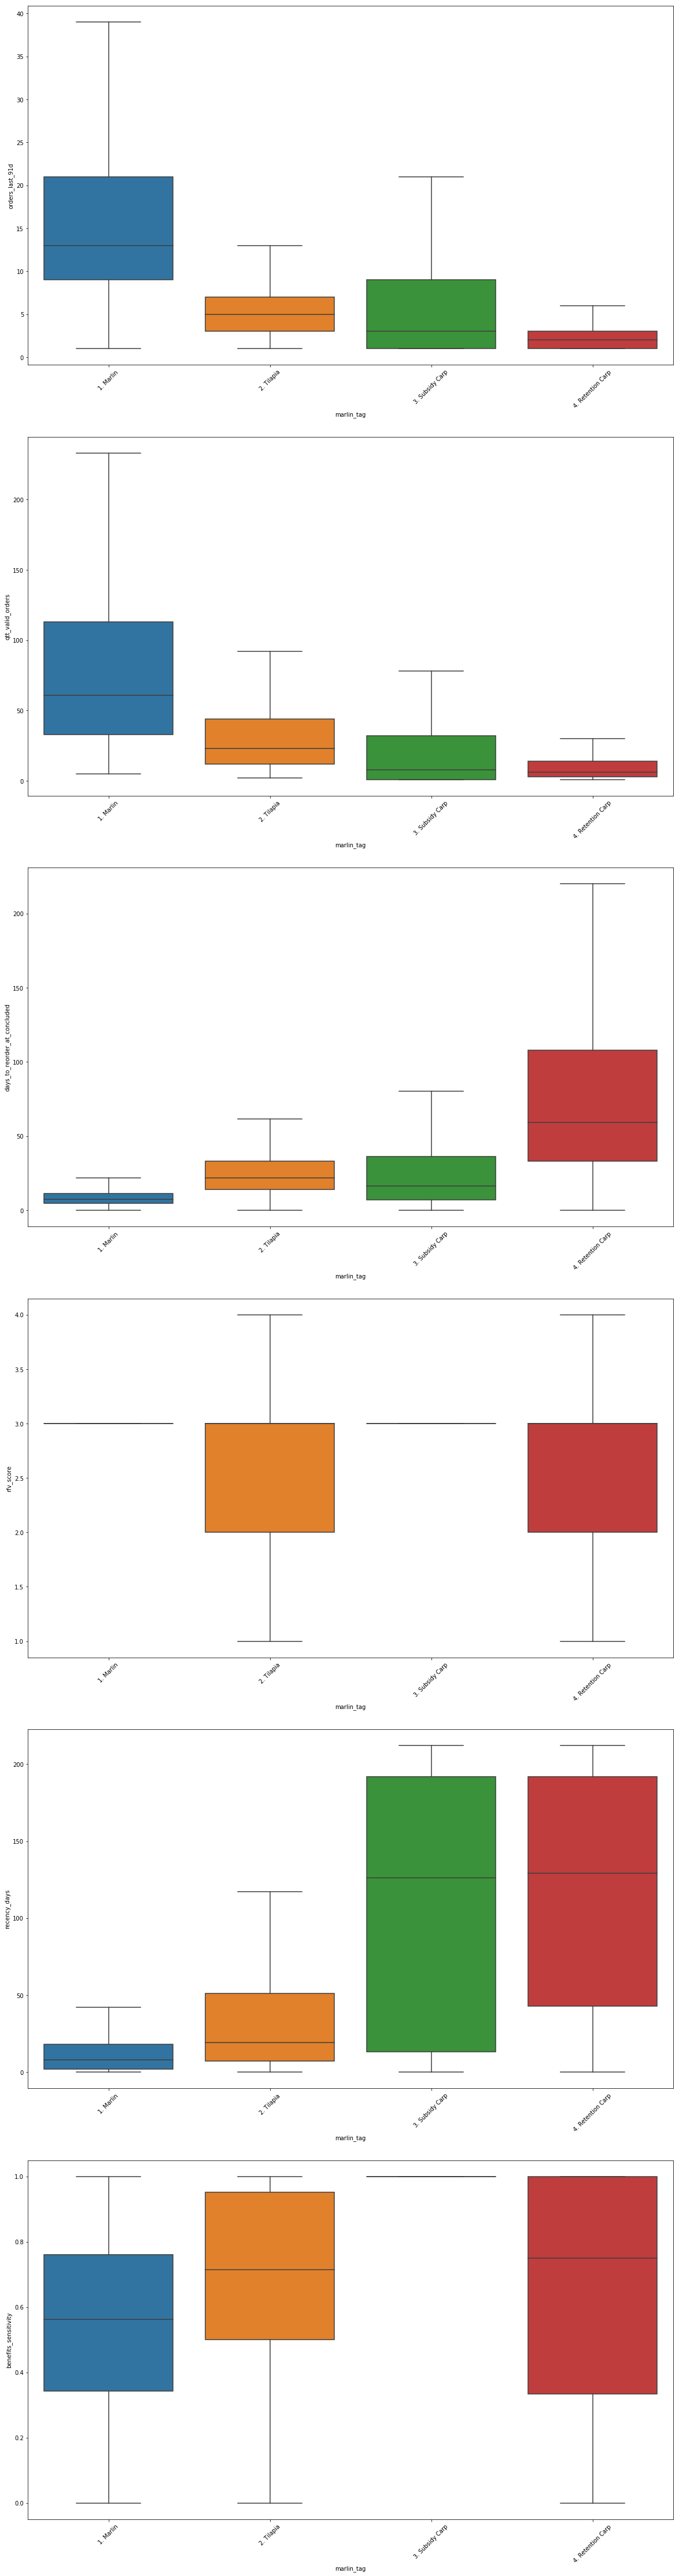

In [0]:
import seaborn as sns
import pandas as pd

categorical = [
 'orders_last_91d',
 #'freq_last_91d',
 # 'qtt_orders_last_year',
 'qtt_valid_orders',
 # 'days_to_reorder_at_datasource',
 'days_to_reorder_at_concluded',
 'rfv_score',
 'recency_days',
# 'recency_months',
 'benefits_sensitivity'
]

fig, ax = plt.subplots(len(categorical), 1, figsize=(20, 80))

for i, col in enumerate(categorical):
  plt.subplot(len(categorical), 1, i+1)
  plt.xlabel(col, fontsize=10)
  plt.xticks(rotation=45)

  sns.boxplot(
    x='marlin_tag',
    y = col,
    data=pdDados,
    dodge=False,
    showfliers=False,
    order = ['1. Marlin', '2. Tilapia', '3. Subsidy Carp', '4. Retention Carp']
  )

plt.show()

In [0]:
pdDados[pdDados['marlin_tag'] == '1. Marlin'].corr()

,orders_last_91d,qtt_orders_last_year,qtt_valid_orders,recency_months,days_to_reorder_at_datasource,days_to_reorder_at_concluded,rfv_score,recency_days,freq_last_91d,benefits_sensitivity
orders_last_91d,1.000000,0.831515,0.628442,-0.050415,-0.672823,-0.676298,0.384901,-0.050762,0.990773,0.079081
qtt_orders_last_year,0.831515,1.000000,0.812612,-0.191466,-0.567398,-0.570957,0.246088,-0.191806,0.817053,0.057453
qtt_valid_orders,0.628442,0.812612,1.000000,-0.161373,-0.433258,-0.437577,0.213342,-0.161644,0.616087,0.010948
recency_months,-0.050415,-0.191466,-0.161373,1.000000,0.002574,-0.003653,0.464120,0.999984,-0.009175,-0.035322
days_to_reorder_at_datasource,-0.672823,-0.567398,-0.433258,0.002574,1.000000,0.985516,-0.455570,0.002832,-0.674382,-0.157671
days_to_reorder_at_concluded,-0.676298,-0.570957,-0.437577,-0.003653,0.985516,1.000000,-0.466704,-0.003378,-0.678046,-0.154825
rfv_score,0.384901,0.246088,0.213342,0.464120,-0.455570,-0.466704,1.000000,0.463980,0.395791,-0.037890
recency_days,-0.050762,-0.191806,-0.161644,0.999984,0.002832,-0.003378,0.463980,1.000000,-0.009465,-0.035289
freq_last_91d,0.990773,0.817053,0.616087,-0.009175,-0.674382,-0.678046,0.395791,-0.009465,1.000000,0.075832
benefits_sensitivity,0.079081,0.057453,0.010948,-0.035322,-0.157671,-0.154825,-0.037890,-0.035289,0.075832,1.000000


#### Correlação

In [0]:
lista = [
 'customer_id',
 'marlin_tag',
 'orders_last_91d',
 #'freq_last_91d',
 # 'qtt_orders_last_year',
 'qtt_valid_orders',
 # 'days_to_reorder_at_datasource',
 'days_to_reorder_at_concluded',
 'rfv_score',
 'recency_days',
# 'recency_months',
 'benefits_sensitivity'
]

correlacao_teste = pdDados[lista].copy()

depara = {'1. Marlin': 1,
                   '2. Tilapia': 2,
                   '3. Subsidy Carp': 3,
                   '4. Retention Carp': 4}

correlacao_teste['marlin_tag'] = correlacao_teste['marlin_tag'].map(depara)
correlacao_teste.drop(columns=['customer_id'],inplace=True)
correlacao_teste.corr(method='spearman')['marlin_tag'].sort_values(ascending=False).reset_index()

,index,marlin_tag
0,marlin_tag,1.000000
1,days_to_reorder_at_concluded,0.664207
2,recency_days,0.567631
3,benefits_sensitivity,0.281302
4,rfv_score,-0.221502
5,qtt_valid_orders,-0.646270
6,orders_last_91d,-0.730467


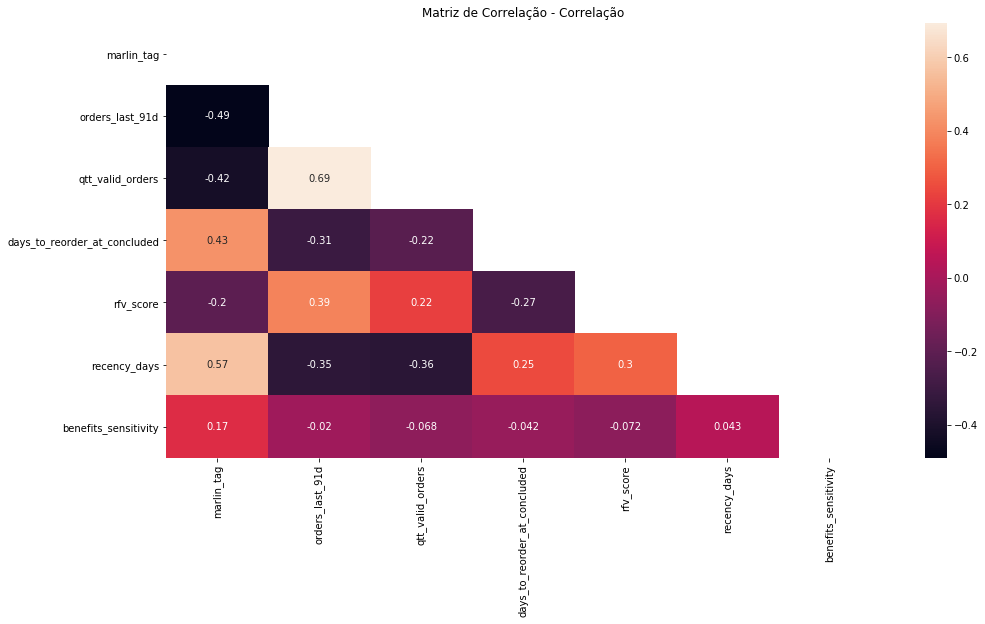

In [0]:
#correlacao_teste.drop(columns='marlin_tag',inplace=True)

correlação = round(correlacao_teste.corr(), 3)
triangulo = correlação.where(np.tril(np.ones(correlação.shape), k=-1).astype(np.bool))

#Criando uma representação gráfica para a matriz de correlação
sns.heatmap(triangulo, 
            xticklabels=correlação.columns.values,
            yticklabels=correlação.columns.values,annot=True)

plt.title('Matriz de Correlação - Marlin Tag')
plt.gcf().set_size_inches(16, 8)
plt.show()

In [0]:
categorical = [
 'orders_last_91d',
 #'freq_last_91d',
 'qtt_orders_last_year',
 'qtt_valid_orders',
 # 'days_to_reorder_at_datasource',
 'days_to_reorder_at_concluded',
 'rfv_score',
 'recency_days',
# 'recency_months',
 'benefits_sensitivity'
]



In [0]:
#Ponto de corte
corte_alta_correlação = 0.7

#Selecionando colunas com correlações acima do corte
dropar = [colunas for colunas in triangulo.columns if any(triangulo[colunas] > corte_alta_correlação )]

print('Temos {} colunas para remover'.format(len(dropar)))

print('As colunas removidas serão', dropar)



Temos 4 colunas para remover
As colunas removidas serão ['orders_last_91d', 'qtt_orders_last_year', 'recency_months', 'days_to_reorder_at_datasource']

# Análise exploratória de dados

In [0]:
display(df_customer_segmentation)

customer_id,segmentation_month,ifood_status_last_month,ifood_status,orders_last_91d,qtt_orders_last_year,qtt_valid_orders,last_valid_order_date,qtt_invalid_orders,last_invalid_order_date,marlin_tag,recency_months,last_nps,registration_date,customer_lifetime_days,customer_lifetime_months,top_3_merchants_code,was_mub_last_month,buyer_last_91d,top_city,top_district,top_centroid_id,first_order_date,last_order_date,days_to_reorder_at_datasource,days_to_reorder_at_concluded,rfv_score,recency_days,recency_days_bucket,recency_days_bucket_description,freq_last_91d,freq_last_91d_bucket,freq_last_91d_bucket_description,avg_aov_last_91d,maturity_orders,maturity_orders_bucket,maturity_orders_bucket_description,benefits_sensitivity,benefits_sensitivity_bucket,preferred_shift_bucket,preferred_shift_bucket_description,merchant_variety,merchant_variety_bucket,merchant_offer,merchant_offer_bucket,merchant_offer_bucket_description,top_dish_bucket,top_dish_bucket_description,preferred_dishes,preferred_dishes_code
bbc5e66e21c935fbc7e1bc6f2b42faa9f335f6a7cf7806ea8fe4bfaecd4f953f,2019-06-01,Inactive,Resurrected,2.0,3,3,2019-06-18,1,2019-06-17,3. Subsidy Carp,0.35483871,Neutral,2018-05-15T16:56:22.949Z,109,3,"[\41af6f5d-b66c-41a2-ae29-acf9b5af280f\"",\""d9a93f26-2c2b-4e35-b2c0-3da635a23840\""]""",0,1,PORTO ALEGRE,Praia De Belas,-30.04-51.23,2019-03-12,2019-06-18,32.666666666666664,49.0,2.0,11.0,2.0,2. 7-14d,0.66,1.0,1. < 1d,42.15,3.0,2.0,2. 2-3,1.0,Alta,3,3. Almoço,1.0,Pedido Unico,1472.0,5,5. > 500,3,3. Mais de uma Cozinha Preferida,"[\Lanches\"",\""Comida Japonesa\""]""","[\JAP\"",\""LCH\""]"""
f6ec8482307ab4f186c202c0ff101dc7a96349f186145fa07e0984bc62e60a4e,2019-07-01,Active,Churn,12.0,16,16,2019-06-22,1,2019-06-28,3. Subsidy Carp,1.25806452,Neutral,2018-12-22T16:53:42.219Z,160,5,"[\65c735db-ea7d-4d7e-b251-75dfc0e9e5bd\"",\""35ad9641-8586-4039-932a-48841270b92d\"",\""c99e58d8-3504-44d6-8627-fe760b7ef29f\""]""",1,1,BELO HORIZONTE,Tupi B,-19.83-43.92,2019-02-20,2019-06-22,8.0,8.166666666666666,3.0,38.0,4.0,4. 28-91d,3.96,3.0,3. 2-4,42.64,16.0,4.0,4. 10-49,1.0,Alta,5,5. Jantar,0.9166666666666666,Alta,1025.0,5,5. > 500,3,3. Mais de uma Cozinha Preferida,"[\Marmita\"",\""Pizza\"",\""Lanches\""]""","[\PIZ\"",\""MA1\"",\""LCH\""]"""
89083156797cad7dcc77cdd74c7aec1a2d895bb98b66cb9f395e1df443553bba,2019-08-01,Active,Active,7.0,26,31,2019-08-23,2,2019-05-15,2. Tilapia,0.22580645,Neutral,2017-02-02T18:19:34.000Z,939,30,"[\831ab627-5f69-4ef2-854b-cbdc1ebbbbf3\"",\""c2b41fea-fbb0-4c7c-b174-2cfd99dd156a\"",\""99c0bb53-73e6-4b97-8920-c7de2deb4f49\""]""",1,1,GRAVATAI,Cohab A,-29.94-51.05,2017-02-02,2019-08-23,13.571428571428573,13.571428571428573,2.0,7.0,1.0,1. < 7d,2.31,3.0,3. 2-4,50.36,31.0,4.0,4. 10-49,0.7142857142857143,Alta,5,5. Jantar,0.8571428571428571,Alta,262.0,4,4. > 150,3,3. Mais de uma Cozinha Preferida,"[\Pizza\"",\""Lanches\""]""","[\PIZ\"",\""LCH\""]"""
83b3746d937cb40cd850794804284d8950845be290aedb0f3d3896e41df3f8d8,2019-12-01,Resurrected,Active,4.0,14,19,2019-12-23,0,null,3. Subsidy Carp,0.22580645,Sem Avaliacoes,2015-06-07T13:01:25.000Z,561,18,"[\b7ad6f75-2809-42b9-b56e-a8bd9d5aa8d3\"",\""5067a1eb-7d10-4ee2-946b-1c1a33b5ac7a\"",\""f66efcff-775a-45db-9959-25375f9c35ac\""]""",1,1,BELO HORIZONTE,OLARIA (BARREIRO),-19.99-44.03,2018-06-17,2019-12-23,35.5,35.5,2.0,7.0,1.0,1. < 7d,1.32,2.0,2. 1-2,33.1,19.0,4.0,4. 10-49,1.0,Alta,6,null,1.0,Pedido Unico,1107.0,5,5. > 500,3,3. Mais de uma Cozinha Preferida,"[\Salgados\"",\""Comida Brasileira\"",\""Lanches\""]""","[\BRA\"",\""LCH\"",\""SAG\""]"""
f2f4939afb7ca6087aa3bfda8a1d19396cb6ce276016188752f4c8d0c4848dd6,2019-09-01,Active,Churn,12.0,25,33,2019-08-19,0,null,1. Marlin,1.32258065,Sem Avaliacoes,2017-11-26T20:34:36.781Z,659,21,"[\2ffa04af-4c76-4c53-b906-c399867b9853\"",\""af5125a4-06dd-4743-a5ad-171f543246d4\"",\""39731c23-8440-44f9-a35c-4bfdb4e67250\""]""",1,1,CAMPO GRANDE,Vila Vilas Boas,-20.48-54.59,2017-12-09,2019-08-19,8.25,8.25,3.0,41.0,4.0,4. 28-91d,3.96,3.0,3. 2-4,49.6,33.0,4.0,4. 10-49,0.0,Baixa

In [0]:
importa pandas as pd
pd.DataFrame(df_customer_segmentation.head(3)).transpose()

### Duplicadas

_Removidas 48 linhas duplicadas._

In [0]:
df_customer_segmentation.drop_duplicates().count()

Out[3]: 210316

In [0]:
df_customer_segmentation = df_customer_segmentation.drop_duplicates()

### Missing

_4 variáveis tem valor significativo de missing._

_last_invalid_order_date: 56% não tiveram pedidos inválidos na vida;_

_days_to_reorder_at_datasource e days_to_reorder_at_concluded: ~9% não tem intervalo entre compras. Clientes que compraram somente uma vez;_

_preferred_shift_bucket_description: 26% não tem turno preferido._

In [0]:
#Realiza a contagem da quantidade de missing que existe dentro de um dataframe

from pyspark.sql.functions import count, when, isnull, col

def contar_missing(df):
  aux = []
  for c in df.columns:
    aux.append(count(when(isnull(c), c)).alias(c))
  return df.select(aux)

In [0]:
display(contar_missing(df_customer_segmentation))

customer_id,segmentation_month,ifood_status_last_month,ifood_status,orders_last_91d,qtt_orders_last_year,qtt_valid_orders,last_valid_order_date,qtt_invalid_orders,last_invalid_order_date,marlin_tag,recency_months,last_nps,registration_date,customer_lifetime_days,customer_lifetime_months,top_3_merchants_code,was_mub_last_month,buyer_last_91d,top_city,top_district,top_centroid_id,first_order_date,last_order_date,days_to_reorder_at_datasource,days_to_reorder_at_concluded,rfv_score,recency_days,recency_days_bucket,recency_days_bucket_description,freq_last_91d,freq_last_91d_bucket,freq_last_91d_bucket_description,avg_aov_last_91d,maturity_orders,maturity_orders_bucket,maturity_orders_bucket_description,benefits_sensitivity,benefits_sensitivity_bucket,preferred_shift_bucket,preferred_shift_bucket_description,merchant_variety,merchant_variety_bucket,merchant_offer,merchant_offer_bucket,merchant_offer_bucket_description,top_dish_bucket,top_dish_bucket_description,preferred_dishes,preferred_dishes_code
0,0,0,0,6,0,0,6,0,117833,6,6,0,110,0,0,6,0,0,0,6,6,6,6,18394,19416,6,6,6,6,6,6,6,6,6,6,6,6,6,0,55050,6,6,6,0,6,0,6,6,6


In [0]:
#Calcula a porcentagem de missing em cada variável

def percent_missing(df):
  total_linhas = df.count()
  df = contar_missing(df)
  colunas = df.columns
  total_missing = df.first().asDict().values()
  valores = zip(colunas, total_missing)
  df_aux = spark.createDataFrame(valores, ['variaveis', 'total_missing'])
  df_aux = df_aux.withColumn('perc_missing', col('total_missing') / total_linhas)
  return df_aux

In [0]:
display(percent_missing(df_customer_segmentation))

variaveis,total_missing,perc_missing
customer_id,0,0.0
segmentation_month,0,0.0
ifood_status_last_month,0,0.0
ifood_status,0,0.0
orders_last_91d,6,2.85284999714715E-5
qtt_orders_last_year,0,0.0
qtt_valid_orders,0,0.0
last_valid_order_date,6,2.85284999714715E-5
qtt_invalid_orders,0,0.0
last_invalid_order_date,117833,0.5602664561897336


### Status Cliente

_Classificação feita todo dia primeiro do mês._

_Junho tem 237 clientes a menos classificados._

_Existem 5 classificações: New, Active, Churn, Inactive, Ressurected_

_Acompanhando os mesmo clientes no período de 6 meses. Novos aparece somente do primeiro mês_

In [0]:
#Confirmação que todos os clientes foram classificados em todos os meses
display(df_customer_segmentation.groupby('segmentation_month').count())

segmentation_month,count
2019-08-01,30079
2019-12-01,30079
2019-10-01,30079
2019-09-01,30079
2019-11-01,30079
2019-06-01,29842
2019-07-01,30079


In [0]:
#Distribuição de status do mês atual por mês de classificação
display(df_customer_segmentation.groupby('segmentation_month','ifood_status').count().orderBy('segmentation_month'))

segmentation_month,ifood_status,count
2019-12-01,Resurrected,2890
2019-12-01,Inactive,10414
2019-12-01,Active,13309
2019-12-01,Churn,3466
2019-11-01,Inactive,10174
2019-11-01,Resurrected,3289
2019-11-01,Churn,3367
2019-11-01,Active,13249
2019-10-01,Resurrected,3312
2019-10-01,Active,13304


In [0]:
#Distribuição de status do mês anterior ao mês de classificação
display(df_customer_segmentation.groupby('segmentation_month','ifood_status_last_month').count().orderBy('segmentation_month'))

segmentation_month,ifood_status_last_month,count
2019-06-01,Inactive,11683
2019-06-01,Churn,75
2019-06-01,Resurrected,3198
2019-06-01,New,1606
2019-06-01,Active,13280
2019-07-01,Resurrected,6628
2019-07-01,New,5367
2019-07-01,Active,18084
2019-08-01,Inactive,3369
2019-08-01,Active,18441


### Orders last 91d

_80% do volume teve até 12 pedidos em todos os meses de classificação._

In [0]:
display(df_customer_segmentation.groupby('segmentation_month','orders_last_91d').count().orderBy('segmentation_month'))

segmentation_month,orders_last_91d,count
2019-06-01,54.0,11
2019-06-01,59.0,8
2019-06-01,1.0,5783
2019-06-01,91.0,1
2019-06-01,6.0,1725
2019-06-01,15.0,471
2019-06-01,104.0,1
2019-06-01,89.0,1
2019-06-01,34.0,61
2019-06-01,72.0,2


In [0]:
#0 não teve nenhuma compra nova, 1 teve alguma compra nova
display(df_customer_segmentation.groupby('segmentation_month','buyer_last_91d').count().orderBy('segmentation_month'))

segmentation_month,buyer_last_91d,count
2019-06-01T00:00:00.000+0000,1,22706
2019-06-01T00:00:00.000+0000,0,7136
2019-07-01T00:00:00.000+0000,1,30079
2019-08-01T00:00:00.000+0000,1,30079
2019-09-01T00:00:00.000+0000,1,29413
2019-09-01T00:00:00.000+0000,0,666
2019-10-01T00:00:00.000+0000,0,7908
2019-10-01T00:00:00.000+0000,1,22171
2019-11-01T00:00:00.000+0000,0,7842
2019-11-01T00:00:00.000+0000,1,22237


In [0]:
display(df_customer_segmentation.groupby('segmentation_month','freq_last_91d').count().orderBy('segmentation_month'))

segmentation_month,freq_last_91d,count
2019-06-01T00:00:00.000+0000,13.8,2
2019-06-01T00:00:00.000+0000,1.76,32
2019-06-01T00:00:00.000+0000,6.74,1
2019-06-01T00:00:00.000+0000,1.12,3
2019-06-01T00:00:00.000+0000,7.11,1
2019-06-01T00:00:00.000+0000,4.93,3
2019-06-01T00:00:00.000+0000,5.84,1
2019-06-01T00:00:00.000+0000,21.82,1
2019-06-01T00:00:00.000+0000,0.94,6
2019-06-01T00:00:00.000+0000,11.54,49


###Orders last year

_80% do volume teve até 40 pedidos em todos os meses de classificação, sendo que o percentual maior é de 1 pedido._

In [0]:
display(df_customer_segmentation.groupby('segmentation_month','qtt_orders_last_year').count().orderBy('segmentation_month'))

segmentation_month,qtt_orders_last_year,count
2019-06-01,82,25
2019-06-01,129,7
2019-06-01,7,981
2019-06-01,145,2
2019-06-01,110,20
2019-06-01,9,890
2019-06-01,197,4
2019-06-01,80,32
2019-06-01,263,1
2019-06-01,268,1


### Valid Order

_últimos pedidos, concentrados em dezembro_

_utilizando a última classificação_

In [0]:
datas = ('2019-12-01', '2019-12-31')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas)).groupby('qtt_valid_orders').count())

qtt_valid_orders,count
26,346
29,295
474,1
65,115
191,15
418,2
541,2
270,5
222,6
293,2


In [0]:
datas = ('2019-12-01', '2019-12-31')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas)).select('qtt_valid_orders').summary())

summary,qtt_valid_orders
count,30079
mean,45.360118354998505
stddev,68.39983948099552
min,1
25%,8
50%,22
75%,55
max,1297


In [0]:
datas = ('2019-12-01', '2019-12-31')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas)).groupby('last_valid_order_date').count().orderBy('last_valid_order_date'))

last_valid_order_date,count
2019-06-01,209
2019-06-02,187
2019-06-03,105
2019-06-04,96
2019-06-05,104
2019-06-06,120
2019-06-07,163
2019-06-08,207
2019-06-09,202
2019-06-10,111


### Invalid Order

_Aumento de pedidos invalidos a partir de abril/19, pico em junho/19._

In [0]:
df_customer_segmentation_null = df_customer_segmentation.dropna(subset=['last_invalid_order_date'])
datas = ('2019-12-01', '2019-12-31')
display(df_customer_segmentation_null.where(col('segmentation_month').between(*datas), ).groupby('qtt_invalid_orders').count())

qtt_invalid_orders,count
29,2
26,1
19,8
22,6
7,347
34,1
31,1
25,6
6,479
9,163


In [0]:
datas = ('2019-12-01', '2019-12-31')
display(df_customer_segmentation_null.where(col('segmentation_month').between(*datas), ).select('qtt_invalid_orders').summary())

summary,qtt_invalid_orders
count,15364
mean,2.8303176256183287
stddev,3.0138718757645466
min,1
25%,1
50%,2
75%,3
max,102


In [0]:
datas = ('2019-12-01', '2019-12-31')
display(df_customer_segmentation_null.where(col('segmentation_month').between(*datas)).groupby('last_invalid_order_date').count().orderBy('last_invalid_order_date'))

last_invalid_order_date,count
2012-04-27,1
2012-10-06,1
2013-04-27,1
2013-06-28,1
2013-06-30,1
2013-07-21,1
2013-07-27,1
2013-09-05,1
2013-11-28,1
2013-12-13,1


### Marlin Tag

In [0]:
display(df_customer_segmentation.groupby('marlin_tag','segmentation_month').count().orderBy('segmentation_month','marlin_tag'))

marlin_tag,segmentation_month,count
null,2019-06-01,6
1. Marlin,2019-06-01,5194
2. Tilapia,2019-06-01,7913
3. Subsidy Carp,2019-06-01,6384
4. Retention Carp,2019-06-01,10345
1. Marlin,2019-07-01,6638
2. Tilapia,2019-07-01,8706
3. Subsidy Carp,2019-07-01,6243
4. Retention Carp,2019-07-01,8492
1. Marlin,2019-08-01,8126


In [0]:
#covariancia e correlação analisada anteriormente

### Meses desde o último pedido

In [0]:
display(df_customer_segmentation.select('recency_months','segmentation_month'))

recency_months,segmentation_month
0.35483871,2019-06-01
1.25806452,2019-07-01
0.22580645,2019-08-01
0.22580645,2019-12-01
1.32258065,2019-09-01
0.83870968,2019-12-01
0.0,2019-12-01
2.51612903,2019-08-01
4.96774194,2019-11-01
2.22580645,2019-09-01


In [0]:
#boxplot

In [0]:
datas = ('2019-06-01', '2019-06-30')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas), ).select('recency_months').summary())

summary,recency_months
count,29836
mean,0.36955355921202565
stddev,0.8096752938666772
min,0.0
25%,0.06451613
50%,0.25806452
75%,0.51612903
max,40.03225806


In [0]:
datas = ('2019-07-01', '2019-07-31')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas), ).select('recency_months').summary())


summary,recency_months
count,30079
mean,0.7432781843545331
stddev,0.6062911637457081
min,0.0
25%,0.16129032
50%,0.61290323
75%,1.25806452
max,1.93548387


In [0]:
datas = ('2019-08-01', '2019-08-31')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas), ).select('recency_months').summary())

summary,recency_months
count,30079
mean,1.0663457193945942
stddev,0.9789299287896147
min,0.0
25%,0.19354839
50%,0.67741935
75%,2.06451613
max,2.93548387


In [0]:
datas = ('2019-09-01', '2019-09-30')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas), ).select('recency_months').summary())

summary,recency_months
count,30079
mean,1.3063545563672323
stddev,1.3421246218120901
min,0.0
25%,0.12903226
50%,0.67741935
75%,2.67741935
max,3.90322581


In [0]:
datas = ('2019-10-01', '2019-10-31')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas), ).select('recency_months').summary())

summary,recency_months
count,30079
mean,1.6367425990594764
stddev,1.7111982621693178
min,0.03225806
25%,0.19354839
50%,0.77419355
75%,3.16129032
max,5.0


In [0]:
datas = ('2019-11-01', '2019-11-30')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas), ).select('recency_months').summary())

summary,recency_months
count,30079
mean,1.7970902427547462
stddev,2.048797691888158
min,0.0
25%,0.16129032
50%,0.67741935
75%,3.4516129
max,5.90322581


In [0]:
datas = ('2019-12-01', '2019-12-31')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas), ).select('recency_months').summary())

summary,recency_months
count,30079
mean,2.067723810920577
stddev,2.390406281945188
min,0.0
25%,0.22580645
50%,0.77419355
75%,3.77419355
max,6.93548387


### NPS

_Aumento de Sem avaliação e redução de promotores_

In [0]:
display(df_customer_segmentation.groupby('last_nps','segmentation_month').count().orderBy('segmentation_month','last_nps'))

last_nps,segmentation_month,count
Detractor,2019-06-01,1025
Neutral,2019-06-01,2009
Promoter,2019-06-01,10545
Sem Avaliacoes,2019-06-01,16263
Detractor,2019-07-01,1048
Neutral,2019-07-01,1996
Promoter,2019-07-01,10579
Sem Avaliacoes,2019-07-01,16456
Detractor,2019-08-01,1015
Neutral,2019-08-01,1925


### Lifetime

In [0]:
datas = ('2019-11-01', '2019-11-30')
display(df_customer_segmentation.where(col('segmentation_month').between(*datas), ).select('customer_lifetime_months').summary())

summary,customer_lifetime_months
count,30079
mean,20.70520961468134
stddev,16.745241762127485
min,4
25%,7
50%,15
75%,31
max,94


In [0]:
display(df_customer_segmentation.groupby('segmentation_month','customer_lifetime_months').count().orderBy('segmentation_month','customer_lifetime_months'))

segmentation_month,customer_lifetime_months,count
2019-06-01T00:00:00.000+0000,0,5215
2019-06-01T00:00:00.000+0000,1,1500
2019-06-01T00:00:00.000+0000,2,1339
2019-06-01T00:00:00.000+0000,3,1100
2019-06-01T00:00:00.000+0000,4,1013
2019-06-01T00:00:00.000+0000,5,1023
2019-06-01T00:00:00.000+0000,6,935
2019-06-01T00:00:00.000+0000,7,1000
2019-06-01T00:00:00.000+0000,8,816
2019-06-01T00:00:00.000+0000,9,693
